In [3]:
import pandas as pd
import numpy as np
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# Load dataset
file_path = "LFS PUF April 2016.CSV"
df = pd.read_csv(file_path)

# Select relevant columns
columns = ["PUFC06_MSTAT", "PUFC05_AGE", "PUFC04_SEX", "PUFC03_REL"]
df_subset = df[columns]

# Convert categorical variables to numerical for imputation
df_subset = pd.get_dummies(df_subset, columns=["PUFC04_SEX", "PUFC03_REL"])



In [ ]:
# Replace all instances of one or more spaces with NaN
df.replace(r"^\s+$", np.nan, regex=True, inplace=True)
df

        PUFREG  PUFPRV  PUFPRRCD  PUFHHNUM  PUFURB2K10  PUFPWGTFIN  PUFSVYMO  \
0            1      28      2800         1           2    405.2219         4   
1            1      28      2800         1           2    388.8280         4   
2            1      28      2800         1           2    406.1194         4   
3            1      28      2800         2           2    405.2219         4   
4            1      28      2800         2           2    384.3556         4   
...        ...     ...       ...       ...         ...         ...       ...   
180857      17      59      5900     40880           2    239.4341         4   
180858      17      59      5900     40880           2    189.8885         4   
180859      17      59      5900     40880           2    207.7395         4   
180860      17      59      5900     40880           2    207.7395         4   
180861      17      59      5900     40880           2    277.5219         4   

        PUFSVYYR  PUFPSU  PUFRPL  ...  

In [16]:
white_fucking_spaces = [" " , "  " , "   " , "     "]
df.isin(white_fucking_spaces).sum()

PUFREG             0
PUFPRV             0
PUFPRRCD           0
PUFHHNUM           0
PUFURB2K10         0
PUFPWGTFIN         0
PUFSVYMO           0
PUFSVYYR           0
PUFPSU             0
PUFRPL             0
PUFHHSIZE          0
PUFC01_LNO         0
PUFC03_REL         0
PUFC04_SEX         0
PUFC05_AGE         0
PUFC06_MSTAT       0
PUFC07_GRADE       0
PUFC08_CURSCH      0
PUFC09_GRADTECH    0
PUFC10_CONWR       0
PUFC11_WORK        0
PUFC12_JOB         0
PUFC14_PROCC       0
PUFC16_PKB         0
PUFC17_NATEM       0
PUFC18_PNWHRS      0
PUFC19_PHOURS      0
PUFC20_PWMORE      0
PUFC21_PLADDW      0
PUFC22_PFWRK       0
PUFC23_PCLASS      0
PUFC24_PBASIS      0
PUFC25_PBASIC      0
PUFC26_OJOB        0
PUFC27_NJOBS       0
PUFC28_THOURS      0
PUFC29_WWM48H      0
PUFC30_LOOKW       0
PUFC31_FLWRK       0
PUFC32_JOBSM       0
PUFC33_WEEKS       0
PUFC34_WYNOT       0
PUFC35_LTLOOKW     0
PUFC36_AVAIL       0
PUFC37_WILLING     0
PUFC38_PREVJOB     0
PUFC40_POCC        0
PUFC41_WQTR  

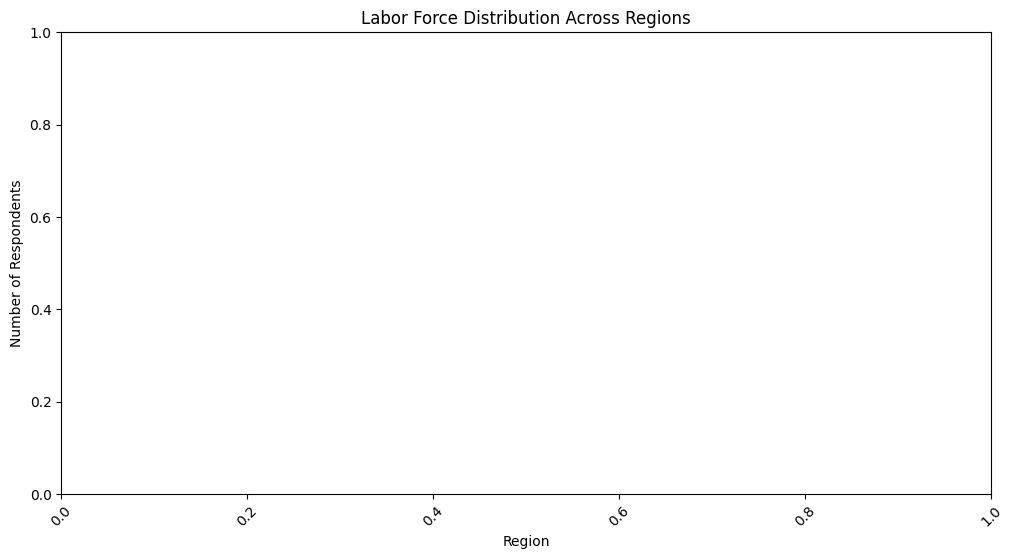

ValueError: Per-column arrays must each be 1-dimensional

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

df = pd.read_csv("LFS PUF April 2016.CSV")


region_distribution = df["PUFREG"].value_counts().sort_index()
plt.figure(figsize=(12, 6))
plt.xlabel("Region")
plt.ylabel("Number of Respondents")
plt.title("Labor Force Distribution Across Regions")
plt.xticks(rotation=45)
plt.show()
sns.barplot(x=region_distribution.index, y=region_distribution.values, palette="viridis")

region_distribution_percentage = (region_distribution / region_distribution.sum()) * 100
# print(region_distribution_percentage)

employment_distribution = df.groupby("PUFREG")["PUFC11_WORK"].value_counts(normalize=True).unstack()

print(employment_distribution)


In [21]:
pd.reset_option('all')
pd.set_option('display.max_colwidth', None)
df["PUFC06_MSTAT"].head(100)

C:\Users\andre\AppData\Local\Temp\ipykernel_28064\3734805666.py:1: FutureWarning: data_manager option is deprecated and will be removed in a future version. Only the BlockManager will be available.
  pd.reset_option('all')
C:\Users\andre\AppData\Local\Temp\ipykernel_28064\3734805666.py:1: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  pd.reset_option('all')


0     2
1     2
2     1
3     2
4     2
     ..
95    1
96    2
97    2
98    1
99    1
Name: PUFC06_MSTAT, Length: 100, dtype: object

In [4]:
# Initialize the imputer
imputer = IterativeImputer(random_state=42)

# Fit and transform the data
df_imputed = pd.DataFrame(imputer.fit_transform(df_subset), columns=df_subset.columns)

# Convert marital status back to its original format (if categorical)
df["PUFC06_MSTAT"] = df_imputed["PUFC06_MSTAT"].round().astype(int)


ValueError: could not convert string to float: ' '

In [6]:
print(df["PUFC06_MSTAT"].isna().sum())  # Should be 0 if all missing values are filled

0
